## Задание 2: Эксперименты с шириной сети (25 баллов)

### 2.1 Сравнение моделей разной ширины (15 баллов)
```python
# Создайте модели с различной шириной слоев:
# - Узкие слои: [64, 32, 16]
# - Средние слои: [256, 128, 64]
# - Широкие слои: [1024, 512, 256]
# - Очень широкие слои: [2048, 1024, 512]
# 
# Для каждого варианта:
# - Поддерживайте одинаковую глубину (3 слоя)
# - Сравните точность и время обучения
# - Проанализируйте количество параметров
```

In [1]:
import torch
from fully_connected_basics.datasets import get_mnist_loaders
from fully_connected_basics.models import FullyConnectedModel
from fully_connected_basics.trainer import train_model
from fully_connected_basics.utils import plot_training_history, count_parameters

In [2]:
device = torch.device('cpu')

train_loader, test_loader = get_mnist_loaders(batch_size=64)

#### Узкйий слой: [64, 32, 16] 

Model parameters: 53018


100%|██████████| 157/157 [00:02<00:00, 63.48it/s]


Epoch 1/5:
Train Loss: 0.3646, Train Acc: 0.8900
Test Loss: 0.2058, Test Acc: 0.9343
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.82it/s]


Epoch 2/5:
Train Loss: 0.1536, Train Acc: 0.9535
Test Loss: 0.1265, Test Acc: 0.9605
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 62.46it/s]


Epoch 3/5:
Train Loss: 0.1167, Train Acc: 0.9646
Test Loss: 0.1224, Test Acc: 0.9630
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 70.58it/s]


Epoch 4/5:
Train Loss: 0.0945, Train Acc: 0.9710
Test Loss: 0.1083, Test Acc: 0.9677
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 69.06it/s]


Epoch 5/5:
Train Loss: 0.0796, Train Acc: 0.9745
Test Loss: 0.1005, Test Acc: 0.9701
--------------------------------------------------


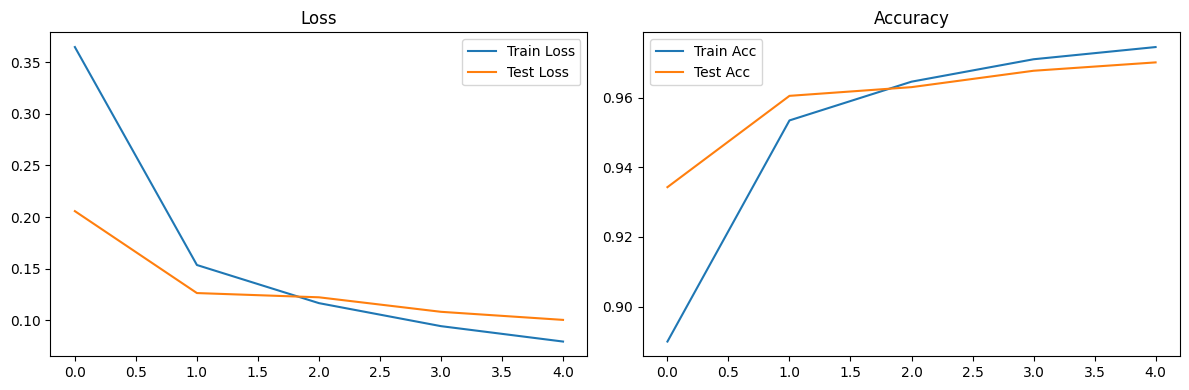

In [3]:
model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 64}, 
        {"type": "relu"},
        {"type": "linear", "size": 32}, 
        {"type": "relu"},
        {"type": "linear", "size": 16}, 
        {"type": "relu"},
    ]
).to(device)

print(f"Model parameters: {count_parameters(model)}")

history = train_model(model, train_loader, test_loader, epochs=5, device=str(device))

plot_training_history(history) 

Модель не переобучаеться, но обучение проходит медлено. 

#### Средний слой: [256, 128, 64]

Model parameters: 242762


100%|██████████| 157/157 [00:02<00:00, 69.33it/s]


Epoch 1/5:
Train Loss: 0.2503, Train Acc: 0.9248
Test Loss: 0.1217, Test Acc: 0.9631
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 68.64it/s]


Epoch 2/5:
Train Loss: 0.1012, Train Acc: 0.9681
Test Loss: 0.1084, Test Acc: 0.9659
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.89it/s]


Epoch 3/5:
Train Loss: 0.0722, Train Acc: 0.9767
Test Loss: 0.0976, Test Acc: 0.9707
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 68.29it/s]


Epoch 4/5:
Train Loss: 0.0523, Train Acc: 0.9828
Test Loss: 0.0906, Test Acc: 0.9738
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 70.08it/s]


Epoch 5/5:
Train Loss: 0.0453, Train Acc: 0.9856
Test Loss: 0.0782, Test Acc: 0.9788
--------------------------------------------------


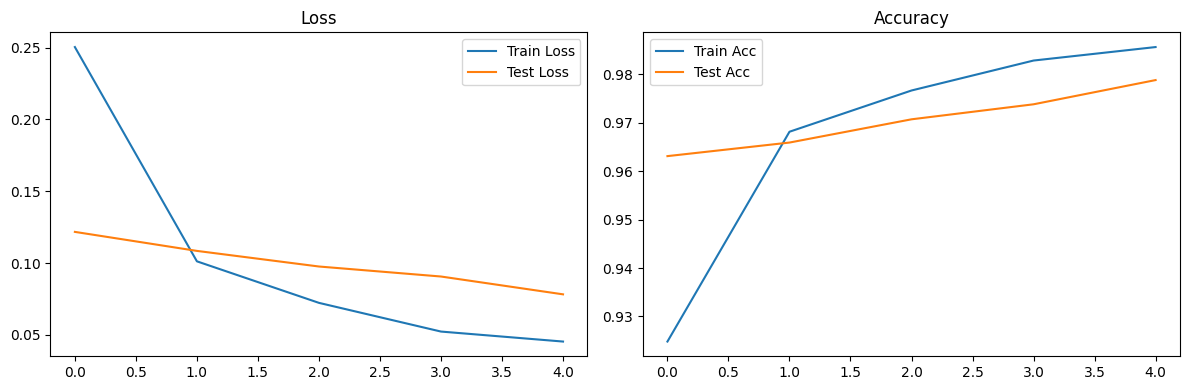

In [4]:
model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 256}, 
        {"type": "relu"},
        {"type": "linear", "size": 128}, 
        {"type": "relu"},
        {"type": "linear", "size": 64}, 
        {"type": "relu"},
    ]
).to(device)

print(f"Model parameters: {count_parameters(model)}")

history = train_model(model, train_loader, test_loader, epochs=5, device=str(device))

plot_training_history(history) 

Модель показывает очень хорошую динамику обучения. 

#### Широкий слой: [1024, 512, 256]

Model parameters: 1462538


100%|██████████| 157/157 [00:02<00:00, 63.02it/s]


Epoch 1/5:
Train Loss: 0.2100, Train Acc: 0.9351
Test Loss: 0.1542, Test Acc: 0.9558
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.13it/s]


Epoch 2/5:
Train Loss: 0.0933, Train Acc: 0.9715
Test Loss: 0.0891, Test Acc: 0.9745
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.78it/s]


Epoch 3/5:
Train Loss: 0.0688, Train Acc: 0.9781
Test Loss: 0.0977, Test Acc: 0.9705
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.63it/s]


Epoch 4/5:
Train Loss: 0.0523, Train Acc: 0.9842
Test Loss: 0.0877, Test Acc: 0.9753
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.17it/s]


Epoch 5/5:
Train Loss: 0.0473, Train Acc: 0.9859
Test Loss: 0.0811, Test Acc: 0.9769
--------------------------------------------------


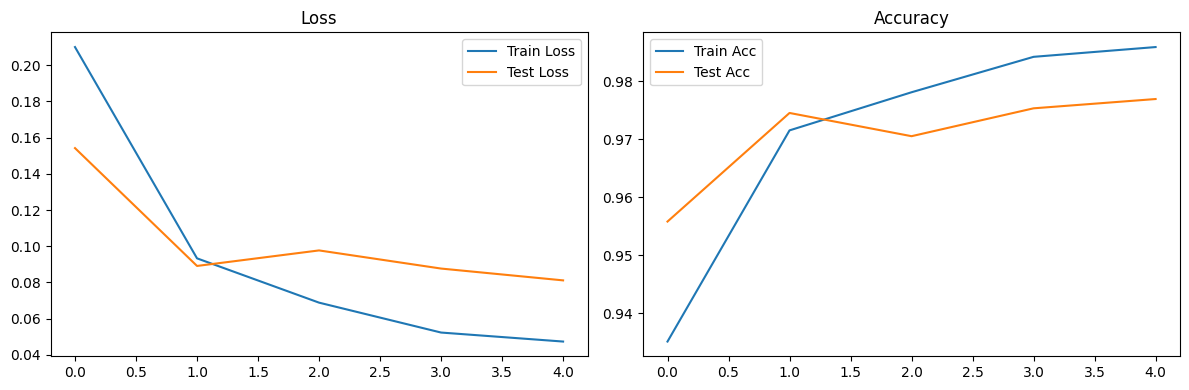

In [5]:
model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 1024}, 
        {"type": "relu"},
        {"type": "linear", "size": 512}, 
        {"type": "relu"},
        {"type": "linear", "size": 256}, 
        {"type": "relu"},
    ]
).to(device)

print(f"Model parameters: {count_parameters(model)}")

history = train_model(model, train_loader, test_loader, epochs=5, device=str(device))

plot_training_history(history) 

Модель начинает переобучаться после 1 эпохи.

#### Очень широкий слой: [2048, 1024, 512]

Model parameters: 4235786


100%|██████████| 157/157 [00:02<00:00, 55.53it/s]


Epoch 1/5:
Train Loss: 0.2086, Train Acc: 0.9365
Test Loss: 0.1164, Test Acc: 0.9649
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 55.39it/s]


Epoch 2/5:
Train Loss: 0.1013, Train Acc: 0.9705
Test Loss: 0.1119, Test Acc: 0.9671
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 54.47it/s]


Epoch 3/5:
Train Loss: 0.0733, Train Acc: 0.9789
Test Loss: 0.1172, Test Acc: 0.9669
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 55.44it/s]


Epoch 4/5:
Train Loss: 0.0581, Train Acc: 0.9823
Test Loss: 0.0945, Test Acc: 0.9746
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 53.20it/s]


Epoch 5/5:
Train Loss: 0.0489, Train Acc: 0.9855
Test Loss: 0.0795, Test Acc: 0.9792
--------------------------------------------------


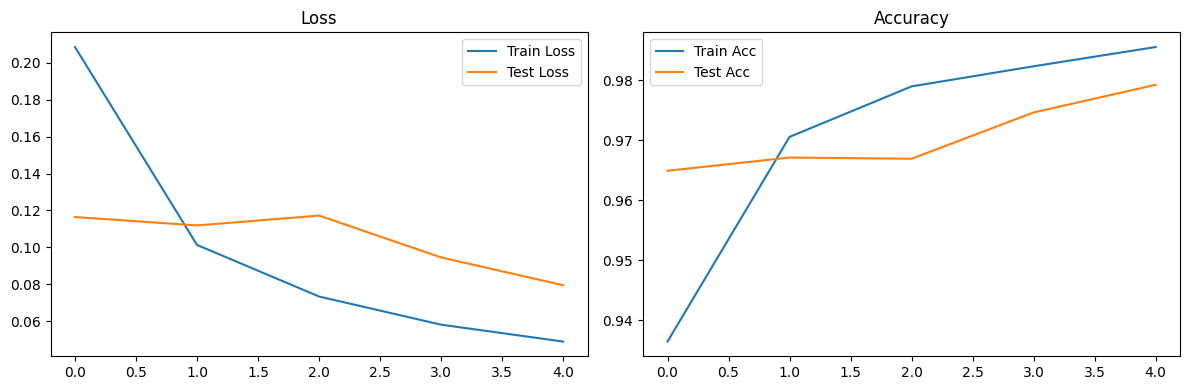

In [6]:
model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 2048}, 
        {"type": "relu"},
        {"type": "linear", "size": 1024}, 
        {"type": "relu"},
        {"type": "linear", "size": 512}, 
        {"type": "relu"},
    ]
).to(device)

print(f"Model parameters: {count_parameters(model)}")

history = train_model(model, train_loader, test_loader, epochs=5, device=str(device))

plot_training_history(history) 

Есть стагнирование в моменте (1-2 эпоха), но так модель показывает хорошую динамику обучения. 

### 2.2 Оптимизация архитектуры (10 баллов)
```python
# Найдите оптимальную архитектуру:
# - Используйте grid search для поиска лучшей комбинации
# - Попробуйте различные схемы изменения ширины (расширение, сужение, постоянная)
# - Визуализируйте результаты в виде heatmap
```

In [9]:
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

# Конфигурация поиска
base_sizes = [64, 128, 256, 512]
schemes = ['increasing', 'decreasing', 'constant']

results = []

for base, scheme in tqdm(list(itertools.product(base_sizes, schemes))):
    # Формируем слои по схеме
    if scheme == 'increasing':
        layers = [base, base*2, base*4]
    elif scheme == 'decreasing':
        layers = [base*4, base*2, base]
    elif scheme == 'constant':
        layers = [base, base, base]
    
    # Создаем конфиг модели
    layers_config = []
    for size in layers:
        layers_config.extend([
            {"type": "linear", "size": size},
            {"type": "batch_norm"},
            {"type": "relu"},
            {"type": "dropout", "rate": 0.2}
        ])
    
    # Создаем и обучаем модель
    model = FullyConnectedModel(
        input_size=784,
        num_classes=10,
        layers=layers_config
    ).to(device)
    
    start_time = time.time()
    history = train_model(model, train_loader, test_loader, epochs=5, device=str(device))
    train_time = time.time() - start_time
    
    # Фиксируем результаты
    best_acc = max(history['test_accs'])
    results.append({
        'base_size': base,
        'scheme': scheme,
        'layers': layers,
        'params': count_parameters(model),
        'time': train_time,
        'accuracy': best_acc
    })

# Сохраняем результаты
results_df = pd.DataFrame(results)

100%|██████████| 157/157 [00:02<00:00, 66.60it/s]


Epoch 1/5:
Train Loss: 0.3619, Train Acc: 0.8911
Test Loss: 0.1361, Test Acc: 0.9571
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 66.70it/s]


Epoch 2/5:
Train Loss: 0.2117, Train Acc: 0.9361
Test Loss: 0.1091, Test Acc: 0.9660
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 68.42it/s]


Epoch 3/5:
Train Loss: 0.1783, Train Acc: 0.9455
Test Loss: 0.0946, Test Acc: 0.9700
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.84it/s]


Epoch 4/5:
Train Loss: 0.1618, Train Acc: 0.9500
Test Loss: 0.0876, Test Acc: 0.9731
--------------------------------------------------


  8%|▊         | 1/12 [01:34<17:18, 94.44s/it]

Epoch 5/5:
Train Loss: 0.1439, Train Acc: 0.9553
Test Loss: 0.0836, Test Acc: 0.9745
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.64it/s]


Epoch 1/5:
Train Loss: 0.3283, Train Acc: 0.9154
Test Loss: 0.1061, Test Acc: 0.9683
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 68.85it/s]


Epoch 2/5:
Train Loss: 0.1539, Train Acc: 0.9546
Test Loss: 0.0865, Test Acc: 0.9732
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 68.16it/s]


Epoch 3/5:
Train Loss: 0.1200, Train Acc: 0.9645
Test Loss: 0.0736, Test Acc: 0.9778
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.20it/s]


Epoch 4/5:
Train Loss: 0.1026, Train Acc: 0.9695
Test Loss: 0.0668, Test Acc: 0.9791
--------------------------------------------------


 17%|█▋        | 2/12 [03:12<16:04, 96.43s/it]

Epoch 5/5:
Train Loss: 0.0924, Train Acc: 0.9713
Test Loss: 0.0655, Test Acc: 0.9792
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 68.00it/s]


Epoch 1/5:
Train Loss: 0.4701, Train Acc: 0.8700
Test Loss: 0.1536, Test Acc: 0.9522
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 68.20it/s]


Epoch 2/5:
Train Loss: 0.2532, Train Acc: 0.9259
Test Loss: 0.1259, Test Acc: 0.9614
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 69.29it/s]


Epoch 3/5:
Train Loss: 0.2135, Train Acc: 0.9355
Test Loss: 0.1067, Test Acc: 0.9678
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 70.25it/s]


Epoch 4/5:
Train Loss: 0.1850, Train Acc: 0.9450
Test Loss: 0.0992, Test Acc: 0.9697
--------------------------------------------------


 25%|██▌       | 3/12 [04:43<14:08, 94.28s/it]

Epoch 5/5:
Train Loss: 0.1766, Train Acc: 0.9476
Test Loss: 0.0910, Test Acc: 0.9722
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 62.84it/s]


Epoch 1/5:
Train Loss: 0.2809, Train Acc: 0.9140
Test Loss: 0.1053, Test Acc: 0.9666
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 61.13it/s]


Epoch 2/5:
Train Loss: 0.1568, Train Acc: 0.9513
Test Loss: 0.0883, Test Acc: 0.9707
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.01it/s]


Epoch 3/5:
Train Loss: 0.1261, Train Acc: 0.9603
Test Loss: 0.0842, Test Acc: 0.9735
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.12it/s]


Epoch 4/5:
Train Loss: 0.1110, Train Acc: 0.9643
Test Loss: 0.0727, Test Acc: 0.9772
--------------------------------------------------


 33%|███▎      | 4/12 [06:27<13:04, 98.10s/it]

Epoch 5/5:
Train Loss: 0.1013, Train Acc: 0.9689
Test Loss: 0.0720, Test Acc: 0.9769
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.71it/s]


Epoch 1/5:
Train Loss: 0.2526, Train Acc: 0.9282
Test Loss: 0.0910, Test Acc: 0.9710
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.05it/s]


Epoch 2/5:
Train Loss: 0.1240, Train Acc: 0.9624
Test Loss: 0.0696, Test Acc: 0.9781
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.46it/s]


Epoch 3/5:
Train Loss: 0.0954, Train Acc: 0.9706
Test Loss: 0.0667, Test Acc: 0.9788
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.74it/s]


Epoch 4/5:
Train Loss: 0.0784, Train Acc: 0.9750
Test Loss: 0.0639, Test Acc: 0.9808
--------------------------------------------------


 42%|████▏     | 5/12 [08:18<11:58, 102.62s/it]

Epoch 5/5:
Train Loss: 0.0694, Train Acc: 0.9783
Test Loss: 0.0623, Test Acc: 0.9811
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 69.21it/s]


Epoch 1/5:
Train Loss: 0.3300, Train Acc: 0.9054
Test Loss: 0.1076, Test Acc: 0.9670
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 69.20it/s]


Epoch 2/5:
Train Loss: 0.1737, Train Acc: 0.9472
Test Loss: 0.0909, Test Acc: 0.9721
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 66.23it/s]


Epoch 3/5:
Train Loss: 0.1405, Train Acc: 0.9572
Test Loss: 0.0808, Test Acc: 0.9745
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 68.00it/s]


Epoch 4/5:
Train Loss: 0.1230, Train Acc: 0.9619
Test Loss: 0.0714, Test Acc: 0.9781
--------------------------------------------------


 50%|█████     | 6/12 [09:52<09:58, 99.80s/it] 

Epoch 5/5:
Train Loss: 0.1093, Train Acc: 0.9665
Test Loss: 0.0694, Test Acc: 0.9797
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.95it/s]


Epoch 1/5:
Train Loss: 0.2356, Train Acc: 0.9264
Test Loss: 0.1052, Test Acc: 0.9661
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.46it/s]


Epoch 2/5:
Train Loss: 0.1354, Train Acc: 0.9579
Test Loss: 0.0947, Test Acc: 0.9730
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.45it/s]


Epoch 3/5:
Train Loss: 0.1072, Train Acc: 0.9663
Test Loss: 0.0762, Test Acc: 0.9762
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 63.27it/s]


Epoch 4/5:
Train Loss: 0.0917, Train Acc: 0.9713
Test Loss: 0.0715, Test Acc: 0.9773
--------------------------------------------------


 58%|█████▊    | 7/12 [11:58<09:01, 108.25s/it]

Epoch 5/5:
Train Loss: 0.0793, Train Acc: 0.9750
Test Loss: 0.0679, Test Acc: 0.9796
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 62.09it/s]


Epoch 1/5:
Train Loss: 0.2114, Train Acc: 0.9370
Test Loss: 0.0905, Test Acc: 0.9727
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 61.98it/s]


Epoch 2/5:
Train Loss: 0.1114, Train Acc: 0.9654
Test Loss: 0.0721, Test Acc: 0.9775
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 61.54it/s]


Epoch 3/5:
Train Loss: 0.0823, Train Acc: 0.9741
Test Loss: 0.0706, Test Acc: 0.9793
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 61.65it/s]


Epoch 4/5:
Train Loss: 0.0681, Train Acc: 0.9782
Test Loss: 0.0646, Test Acc: 0.9797
--------------------------------------------------


 67%|██████▋   | 8/12 [14:22<07:58, 119.58s/it]

Epoch 5/5:
Train Loss: 0.0592, Train Acc: 0.9808
Test Loss: 0.0619, Test Acc: 0.9809
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.86it/s]


Epoch 1/5:
Train Loss: 0.2586, Train Acc: 0.9226
Test Loss: 0.1056, Test Acc: 0.9667
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.75it/s]


Epoch 2/5:
Train Loss: 0.1313, Train Acc: 0.9599
Test Loss: 0.0787, Test Acc: 0.9747
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.82it/s]


Epoch 3/5:
Train Loss: 0.1037, Train Acc: 0.9681
Test Loss: 0.0677, Test Acc: 0.9775
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 66.29it/s]


Epoch 4/5:
Train Loss: 0.0922, Train Acc: 0.9705
Test Loss: 0.0625, Test Acc: 0.9801
--------------------------------------------------


 75%|███████▌  | 9/12 [16:04<05:42, 114.26s/it]

Epoch 5/5:
Train Loss: 0.0801, Train Acc: 0.9748
Test Loss: 0.0627, Test Acc: 0.9806
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 57.26it/s]


Epoch 1/5:
Train Loss: 0.2333, Train Acc: 0.9278
Test Loss: 0.1014, Test Acc: 0.9679
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 57.05it/s]


Epoch 2/5:
Train Loss: 0.1277, Train Acc: 0.9608
Test Loss: 0.0907, Test Acc: 0.9703
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 56.35it/s]


Epoch 3/5:
Train Loss: 0.1036, Train Acc: 0.9678
Test Loss: 0.0875, Test Acc: 0.9737
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 55.52it/s]


Epoch 4/5:
Train Loss: 0.0845, Train Acc: 0.9732
Test Loss: 0.0712, Test Acc: 0.9772
--------------------------------------------------


 83%|████████▎ | 10/12 [19:33<04:46, 143.45s/it]

Epoch 5/5:
Train Loss: 0.0755, Train Acc: 0.9762
Test Loss: 0.0680, Test Acc: 0.9797
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 54.00it/s]


Epoch 1/5:
Train Loss: 0.1964, Train Acc: 0.9397
Test Loss: 0.0892, Test Acc: 0.9738
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 53.59it/s]


Epoch 2/5:
Train Loss: 0.1066, Train Acc: 0.9666
Test Loss: 0.0722, Test Acc: 0.9760
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 54.15it/s]


Epoch 3/5:
Train Loss: 0.0818, Train Acc: 0.9740
Test Loss: 0.0809, Test Acc: 0.9733
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 53.33it/s]


Epoch 4/5:
Train Loss: 0.0646, Train Acc: 0.9787
Test Loss: 0.0681, Test Acc: 0.9770
--------------------------------------------------


 92%|█████████▏| 11/12 [23:32<02:52, 172.49s/it]

Epoch 5/5:
Train Loss: 0.0560, Train Acc: 0.9818
Test Loss: 0.0619, Test Acc: 0.9794
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.09it/s]


Epoch 1/5:
Train Loss: 0.2171, Train Acc: 0.9348
Test Loss: 0.0921, Test Acc: 0.9704
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.63it/s]


Epoch 2/5:
Train Loss: 0.1153, Train Acc: 0.9642
Test Loss: 0.0758, Test Acc: 0.9763
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.36it/s]


Epoch 3/5:
Train Loss: 0.0910, Train Acc: 0.9716
Test Loss: 0.0605, Test Acc: 0.9812
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.28it/s]


Epoch 4/5:
Train Loss: 0.0746, Train Acc: 0.9762
Test Loss: 0.0749, Test Acc: 0.9782
--------------------------------------------------


100%|██████████| 12/12 [25:38<00:00, 128.17s/it]

Epoch 5/5:
Train Loss: 0.0651, Train Acc: 0.9793
Test Loss: 0.0647, Test Acc: 0.9804
--------------------------------------------------


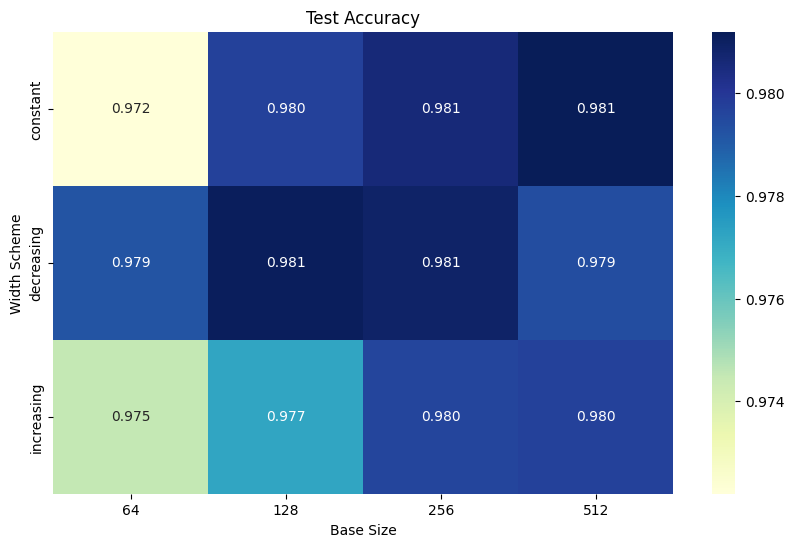

In [12]:
pivot_acc = results_df.pivot(index='scheme', columns='base_size', values='accuracy')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_acc, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Test Accuracy")
plt.xlabel("Base Size")
plt.ylabel("Width Scheme")
plt.show()

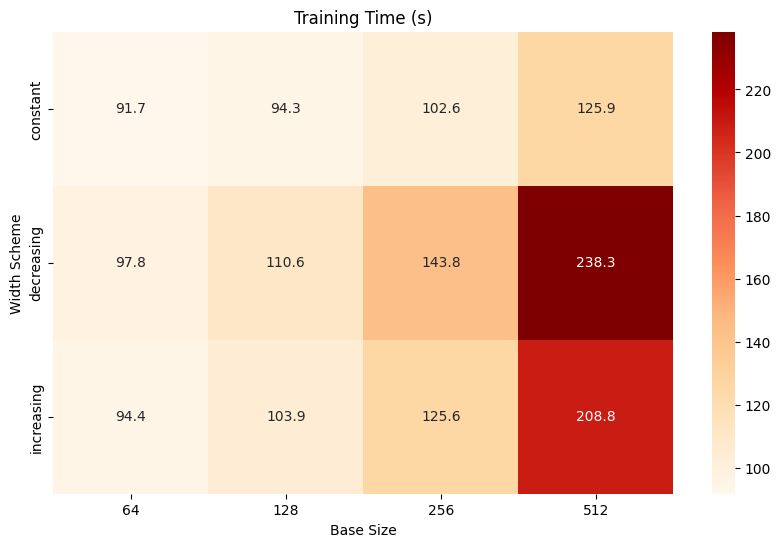

In [11]:
pivot_time = results_df.pivot(index='scheme', columns='base_size', values='time')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_time, annot=True, fmt=".1f", cmap="OrRd")
plt.title("Training Time (s)")
plt.xlabel("Base Size")
plt.ylabel("Width Scheme")
plt.show()

Есть 4 модели с одинаковыми высокими точностями(2 модели с сужением ширины и 2 с константными ширинами). У этих четырех моделей отличаеться время обучения, поэтому лучшей моделью будет модель с наимешьим временем, с сужением ширины и такими рядами нейронов: [512, 256, 128]